In [1]:
from datetime import date

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/reviews.csv')

In [3]:
df.shape

(1406, 11)

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(1399, 11)

In [6]:
df.head(10)

,bank,user_name,title,date,review,home_banking,security,support,promotions,services,local_presence
0,qonto,Alessio,Qonto per la mia attività,21 Giugno 2023,"Da libero professionista, Qonto è stata una pi...",100,80,80,100,100,60
1,trade-republic,Fulvio,Conto deposito trade republic,21 Giugno 2023,Ho iniziato ad utilizzare Trade Republic per p...,80,100,80,80,80,100
2,santander,Mauro,Finanziamento,21 Marzo 2023,Buonasera\nHo chiesto un finanziamento di 2500...,40,20,20,20,20,20
3,santander,Laritza Iznaga,Deluso,24 Settembre 2022,Buongiorno come prima esperienza con la Banca ...,20,20,20,20,20,20
4,tinaba,Giacomo,Conto deposito con Tinaba,21 Giugno 2023,Investire nel conto deposito di Tinaba è stata...,100,80,80,100,80,60
5,tinaba,Mauro Sartore,precisazione,18 Febbraio 2022,Solo per specificare che contrariamente a quan...,100,100,100,100,100,100
6,tinaba,Luca,Il conto e la carta che cercavo. Eccezionale!,23 Dicembre 2021,Ho aperto Tinaba da qualche mese e penso che a...,100,100,100,80,80,20
7,american-express,Daniele,La uso tutti i mesi,01 Dicembre 2019,Molto facile da usare con app che ti indica i ...,100,100,100,100,60,40
8,illimity,Andrea,Traverso,04 Gennaio 2020,"Assolutamente non ci siamo, iniziate le pratic...",20,20,20,20,20,20
9,illimity,Alberto,C/c facile da aprire,25 Novembre 2019,Conto corrente online facile da utilizzare ed ...,100,100,80,100,100,60


In terms of scores we consider only the following: `home_banking`, `support` and `local_presence`

In [7]:
df = df[['bank', 'user_name', 'title', 'date', 'review', 'home_banking', 'support', 'local_presence']]

In [8]:
def convert_date_str(date_str):
    it_month_number_map = {
        'gennaio': '01', 'febbraio': '02', 'marzo': '03', 'aprile': '04',
        'maggio': '05', 'giugno': '06', 'luglio': '07', 'agosto': '08',
        'settembre': '09', 'ottobre': '10', 'novembre': '11', 'dicembre': '12'
    }
    day, month_italian, year = date_str.split(' ')
    month = it_month_number_map[month_italian.lower()]
    return date(int(year), int(month), int(month))

In [9]:
df['date'] = df['date'].apply(convert_date_str)

In [10]:
df.head()

,bank,user_name,title,date,review,home_banking,support,local_presence
0,qonto,Alessio,Qonto per la mia attività,2023-06-06,"Da libero professionista, Qonto è stata una pi...",100,80,60
1,trade-republic,Fulvio,Conto deposito trade republic,2023-06-06,Ho iniziato ad utilizzare Trade Republic per p...,80,80,100
2,santander,Mauro,Finanziamento,2023-03-03,Buonasera\nHo chiesto un finanziamento di 2500...,40,20,20
3,santander,Laritza Iznaga,Deluso,2022-09-09,Buongiorno come prima esperienza con la Banca ...,20,20,20
4,tinaba,Giacomo,Conto deposito con Tinaba,2023-06-06,Investire nel conto deposito di Tinaba è stata...,100,80,60


Cariparma has been acquired by Crédit Agricole, we rename matching rows in the dataset

In [11]:
cariparma_filter = df['bank'] == 'cariparma'

In [12]:
df.loc[cariparma_filter, 'bank'] = 'credit-agricole'

We will consider only selected banks

In [13]:
selected_banks = ['widiba', 'monte-dei-paschi-di-siena', 'banca-popolare-di-milano', 'bnl', 'che-banca', 'ing-direct', 'intesa-sanpaolo', 'unicredit', 'banca-sella', 'credit-agricole']

In [14]:
df = df.loc[df['bank'].isin(selected_banks)]

We drop rows which don't have score for columns of interest

In [15]:
rows_with_no_score = (df['home_banking'] == 0) | (df['support'] == 0) | (df['local_presence'] == 0)

In [16]:
df.loc[rows_with_no_score]

,bank,user_name,title,date,review,home_banking,support,local_presence
418,bnl,Sas_Agne,buono,2010-11-11,"Ciao,\n\nsono una casalinga e ho il conto corr...",0,80,0
419,bnl,Monica,Perte Revolution,2010-11-11,ciao a tutti!\n\n\nho 25 anni e ho attivato il...,0,80,0
439,banca-sella,bilbo061075,un disastro,2012-10-10,Purtroppo ho avuto a che fare quasi un anno co...,0,20,0
440,banca-sella,Sas_Agne,mediocre,2010-12-12,il conto corrente internet di sella è soddisfa...,0,60,0
441,banca-sella,Monica,conto corrente online scadente,2010-11-11,Ho attivato il conto corrente Tuo click perché...,0,40,0
654,ing-direct,cesare colaiuta,Eccellente,2014-03-03,L'unica limitazione sonno i preieievi gratuiti...,0,100,0
655,ing-direct,Sandro,"conto corrente ok, mutui meno",2014-02-02,Il conto consente di tare praticamente tutto o...,0,20,0
656,ing-direct,Giuseppe,Ing,2014-02-02,"Competenti e cordiali, da tanti anni loro clie...",0,20,0
657,ing-direct,LUIGI,SERVIZIO CLIENTI CONTO ARANCIO,2014-02-02,Conto Arancio richiesto direttamente in filial...,0,60,0
658,ing-direct,Matteo,Perfetto,2014-02-02,Un conto attivato in maniera abbastanza facile...,0,80,0


In [17]:
df.drop(index=df[rows_with_no_score].index, inplace=True)

In [18]:
df.shape

(729, 8)

In [19]:
df['year_review'] = df['date'].apply(lambda x: x.year)

In [20]:
df.groupby(['bank', 'year_review'])['bank'].count()

bank                      year_review
banca-popolare-di-milano  2014           2
                          2017           2
                          2018           1
                          2019           3
                          2020           2
                                        ..
widiba                    2019           4
                          2020           3
                          2021           4
                          2022           4
                          2023           3
Name: bank, Length: 81, dtype: int64

In [21]:
df['year_review'].describe()

count     729.000000
mean     2017.773663
std         2.298965
min      2014.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2023.000000
Name: year_review, dtype: float64

In [22]:
df.describe()

,home_banking,support,local_presence,year_review
count,729.000000,729.000000,729.000000,729.000000
mean,46.941015,40.823045,42.277092,2017.773663
std,32.675529,31.244915,29.216416,2.298965
min,20.000000,20.000000,20.000000,2014.000000
25%,20.000000,20.000000,20.000000,2017.000000
50%,20.000000,20.000000,20.000000,2018.000000
75%,80.000000,60.000000,60.000000,2019.000000
max,120.000000,100.000000,100.000000,2023.000000


A 120 score for home_banking is not valid, we will drop the review, score ranges from 20 to 100.

In [23]:
df.drop(df.loc[df['home_banking'] == 120].index, inplace=True)

In [24]:
df.describe()

,home_banking,support,local_presence,year_review
count,728.000000,728.000000,728.000000,728.000000
mean,46.840659,40.851648,42.307692,2017.771978
std,32.585377,31.256845,29.224810,2.300095
min,20.000000,20.000000,20.000000,2014.000000
25%,20.000000,20.000000,20.000000,2016.750000
50%,20.000000,20.000000,20.000000,2018.000000
75%,80.000000,60.000000,60.000000,2019.000000
max,100.000000,100.000000,100.000000,2023.000000


In [25]:
df['year_review'].describe()

count     728.000000
mean     2017.771978
std         2.300095
min      2014.000000
25%      2016.750000
50%      2018.000000
75%      2019.000000
max      2023.000000
Name: year_review, dtype: float64

In [26]:
def weight_for_year(year):
    weight_score_lte_2016 = 10
    weight_score_btwn_2016_2018 = 20
    weight_score_btwn_2018_2019 = 30
    weight_score_gte_2019 = 40
    if year <= 2016:
        return weight_score_lte_2016
    elif  year == 2017:
        return weight_score_btwn_2016_2018
    elif year == 2018:
        return weight_score_btwn_2018_2019
    elif year >= 2019:
        return weight_score_gte_2019
    else:
        raise RuntimeError('Undefined score')

In [27]:
df['year_score_weight'] = df['year_review'].apply(weight_for_year)

In [28]:
def scores_per_bank(bank_name, df):
    """
    Scaling review scores according to the date,
    recent scores have a higher weight compared to older ones.
    """
    res = {}
    bank_rows = df['bank'] == bank_name
    score_cols = ['home_banking', 'support', 'local_presence']
    for s in score_cols:
        # Weighted average
        s_weighted_avg = round((df.loc[bank_rows][s] * df.loc[bank_rows]['year_score_weight']).sum() / df.loc[bank_rows]['year_score_weight'].sum(), 2)
        res[s] = s_weighted_avg
    return res

In [29]:
bank_scores = []
for bank in selected_banks:
    bank_score = {'bank_name': bank}
    scores = scores_per_bank(bank, df)
    # | merges two dict
    bank_scores.append(bank_score | scores)

In [30]:
bank_scores

[{'bank_name': 'widiba',
  'home_banking': 42.52,
  'support': 34.95,
  'local_presence': 33.3},
 {'bank_name': 'monte-dei-paschi-di-siena',
  'home_banking': 31.54,
  'support': 23.59,
  'local_presence': 31.03},
 {'bank_name': 'banca-popolare-di-milano',
  'home_banking': 43.41,
  'support': 32.68,
  'local_presence': 35.61},
 {'bank_name': 'bnl',
  'home_banking': 24.24,
  'support': 20.0,
  'local_presence': 27.27},
 {'bank_name': 'che-banca',
  'home_banking': 41.36,
  'support': 35.59,
  'local_presence': 31.61},
 {'bank_name': 'ing-direct',
  'home_banking': 47.94,
  'support': 38.29,
  'local_presence': 30.6},
 {'bank_name': 'intesa-sanpaolo',
  'home_banking': 39.39,
  'support': 38.28,
  'local_presence': 52.09},
 {'bank_name': 'unicredit',
  'home_banking': 45.31,
  'support': 35.55,
  'local_presence': 52.32},
 {'bank_name': 'banca-sella',
  'home_banking': 48.09,
  'support': 39.57,
  'local_presence': 40.85},
 {'bank_name': 'credit-agricole',
  'home_banking': 33.02,
  's

In [31]:
scores_df = pd.DataFrame(bank_scores)

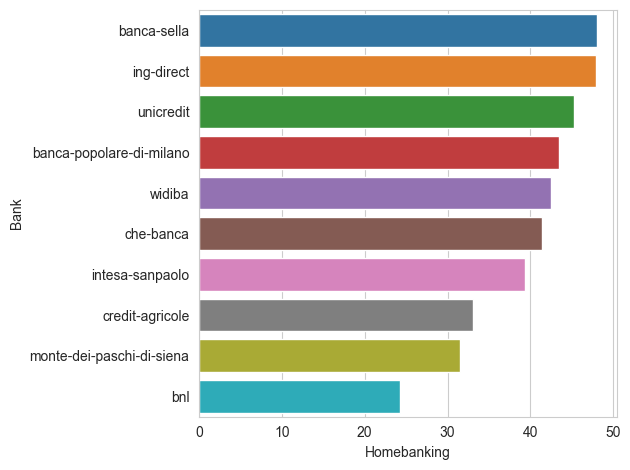

In [32]:
sns.barplot(scores_df, x='home_banking', y='bank_name', order=scores_df.sort_values('home_banking', ascending=False).bank_name)
plt.xlabel("Homebanking", size=10)
plt.ylabel("Bank", size=10)
plt.tight_layout()

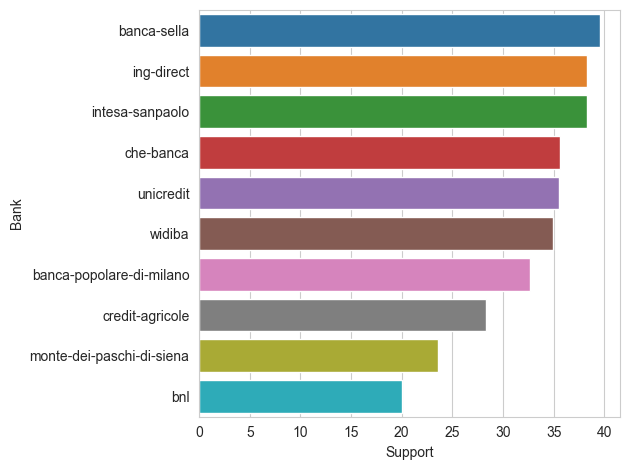

In [33]:
sns.barplot(scores_df, x='support', y='bank_name', order=scores_df.sort_values('support', ascending=False).bank_name)
plt.xlabel("Support", size=10)
plt.ylabel("Bank", size=10)
plt.tight_layout()

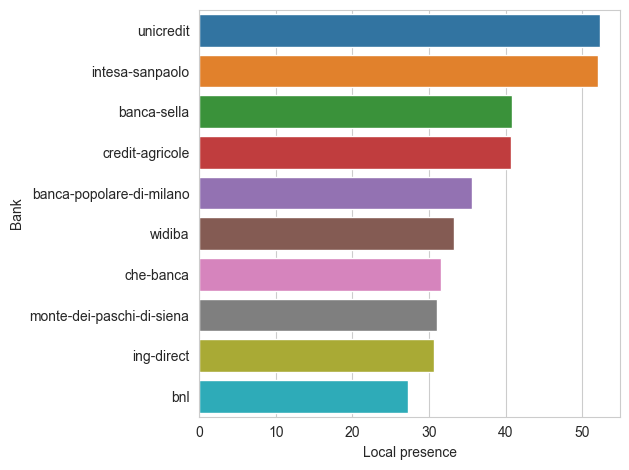

In [34]:
sns.barplot(scores_df, x='local_presence', y='bank_name', order=scores_df.sort_values('local_presence', ascending=False).bank_name)
plt.xlabel("Local presence", size=10)
plt.ylabel("Bank", size=10)
plt.tight_layout()

In [35]:
scores_df['mean_score'] = (scores_df['home_banking'] + scores_df['support'] + scores_df['local_presence']) / 3.0

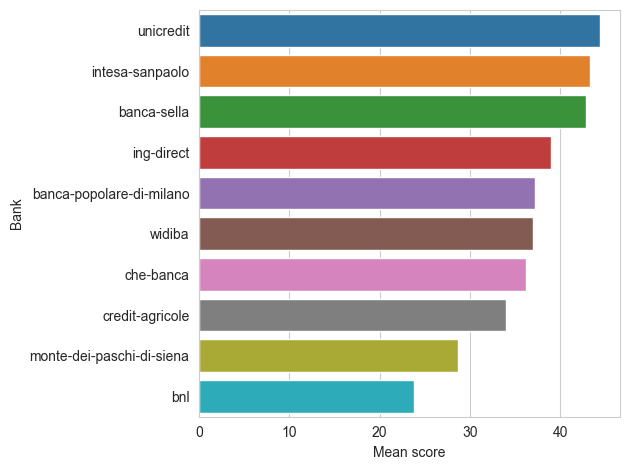

In [36]:
sns.barplot(scores_df, x='mean_score', y='bank_name', order=scores_df.sort_values('mean_score', ascending=False).bank_name)
plt.xlabel("Mean score", size=10)
plt.ylabel("Bank", size=10)
plt.tight_layout()

In [37]:
scores_df

,bank_name,home_banking,support,local_presence,mean_score
0,widiba,42.52,34.95,33.30,36.923333
1,monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000
2,banca-popolare-di-milano,43.41,32.68,35.61,37.233333
3,bnl,24.24,20.00,27.27,23.836667
4,che-banca,41.36,35.59,31.61,36.186667
5,ing-direct,47.94,38.29,30.60,38.943333
6,intesa-sanpaolo,39.39,38.28,52.09,43.253333
7,unicredit,45.31,35.55,52.32,44.393333
8,banca-sella,48.09,39.57,40.85,42.836667
9,credit-agricole,33.02,28.30,40.75,34.023333


In [38]:
def normalized_score_min_max(x, col_name, data_frame, reversed_scale=False):
    min_score = data_frame[col_name].min()
    max_score = data_frame[col_name].max()
    if reversed_scale:
        normalized_val = (max_score - x) / (max_score - min_score)
    else:
        normalized_val = (x - min_score) / (max_score - min_score)
    return normalized_val

In [39]:
score_cols = ['home_banking', 'support', 'local_presence']

In [40]:
for s in score_cols:
    name_col = f'normalized_{s}'
    scores_df[name_col] = scores_df[s].apply(normalized_score_min_max, args=(s, scores_df))

In [41]:
scores_df.set_index('bank_name', inplace=True)

We now acquire banking kpi

In [42]:
df_banking = pd.read_csv('data/indicatori.csv')

In [43]:
df_banking.head(10)

,Banca,TIER1 ratio,Total capital ratio,ROE,cyber risk rating,crediti in sofferenza / tot crediti,Tasso variazione biennale Utile,normalized_TIER1_ratio,normalized_ROE,normalized_cyber_risk_rating,normalized_crediti in sofferenza / tot crediti,normalized_Tasso variazione biennale Utile
0,INTESA SANPAOLO,16.00,19.00,9.717,751.43,2.212101,0.332420,0.377137,0.854225,0.6286,0.151080,0.000000
1,UNICREDIT SPA,17.97,20.88,11.479,750.00,2.445522,3.330094,0.587607,0.938717,0.6000,0.226933,0.073358
2,ING BANK NV,14.51,17.54,12.757,720.00,1.747185,0.511833,0.217949,1.000000,0.0000,0.000000,0.004391
3,BANCO BPM SPA,16.00,19.00,8.011,740.00,3.635720,41.195948,0.377137,0.772418,0.4000,0.613702,1.000000
4,BANCA MONTE DEI PASCHI DI SIENA SPA,15.79,19.67,-8.097,750.00,3.920501,0.878546,0.354701,0.000000,0.6000,0.706245,0.013365
5,CREDIT AGRICOLE ITALIA S.P.A.,15.30,18.30,7.532,751.43,3.426325,13.387322,0.302350,0.749449,0.6286,0.545657,0.319476
6,BANCA NAZIONALE DEL LAVORO SPA,12.47,15.01,8.762,751.43,4.824468,0.817948,0.000000,0.808430,0.6286,1.000000,0.011882
7,BANCA SELLA SPA,18.63,21.16,12.374,770.00,2.571096,1.680982,0.658120,0.981634,1.0000,0.267740,0.033002
8,BANCA WIDIBA S.P.A.,21.83,21.83,9.405,750.00,1.748415,0.497005,1.000000,0.839263,0.6000,0.000400,0.004028


In [44]:
df_banking.set_index('Banca', inplace=True)

In [45]:
df_banking.rename(index={
    'INTESA SANPAOLO': 'intesa-sanpaolo',
    'UNICREDIT SPA': 'unicredit',
    'ING BANK NV': 'ing-direct',
    'BANCO BPM SPA': 'banca-popolare-di-milano',
    'BANCA MONTE DEI PASCHI DI SIENA SPA': 'monte-dei-paschi-di-siena',
    'BANCA WIDIBA S.P.A.': 'widiba',
    'BANCA NAZIONALE DEL LAVORO SPA': 'bnl',
    'BANCA SELLA SPA': 'banca-sella',
    'CREDIT AGRICOLE ITALIA S.P.A.': 'credit-agricole'
}, inplace=True)

In [46]:
df_banking_subset = df_banking.loc[:,['TIER1 ratio', 'normalized_TIER1_ratio', 'ROE', 'normalized_ROE', 'cyber risk rating', 'normalized_cyber_risk_rating']]

In [47]:
df_banking_subset

,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating
Banca,,,,,,
intesa-sanpaolo,16.00,0.377137,9.717,0.854225,751.43,0.6286
unicredit,17.97,0.587607,11.479,0.938717,750.00,0.6000
ing-direct,14.51,0.217949,12.757,1.000000,720.00,0.0000
banca-popolare-di-milano,16.00,0.377137,8.011,0.772418,740.00,0.4000
monte-dei-paschi-di-siena,15.79,0.354701,-8.097,0.000000,750.00,0.6000
credit-agricole,15.30,0.302350,7.532,0.749449,751.43,0.6286
bnl,12.47,0.000000,8.762,0.808430,751.43,0.6286
banca-sella,18.63,0.658120,12.374,0.981634,770.00,1.0000
widiba,21.83,1.000000,9.405,0.839263,750.00,0.6000


We now acquire mortgages rates


In [48]:
mortgage_df_1968 = pd.read_csv('data/mutui_1968.csv')
mortgage_df_1978 = pd.read_csv('data/mutui_1978.csv')
mortgage_df_1988 = pd.read_csv('data/mutui_1988.csv')
mortgage_df_1998 = pd.read_csv('data/mutui_1998.csv')

In [49]:
mortgages = [mortgage_df_1968, mortgage_df_1978, mortgage_df_1988, mortgage_df_1998]

In [50]:
for m in mortgages:
    m.set_index('Banca', inplace=True)
    m.rename(index={
     'INTESA SANPAOLO': 'intesa-sanpaolo',
     'UNICREDIT': 'unicredit',
     'ING': 'ing-direct',
     'BANCO BPM': 'banca-popolare-di-milano',
     'BANCA MONTE DEI PASCHI DI SIENA': 'monte-dei-paschi-di-siena',
     'BANCA WIDIBA S.P.A.': 'widiba',
     'BNL - GRUPPO BNP PARIBAS': 'bnl',
     'BANCA SELLA': 'banca-sella',
     'CRÉDIT AGRICOLE ITALIA': 'credit-agricole'
    }, inplace=True)
    m['normalized_taeg'] = m['Taeg'].apply(normalized_score_min_max, args=('Taeg', m, True))

In [51]:
mortgages_1968_taeg = mortgages[0].loc[:, ['Taeg', 'normalized_taeg']]
mortgages_1978_taeg = mortgages[1].loc[:, ['Taeg', 'normalized_taeg']]
mortgages_1988_taeg = mortgages[2].loc[:, ['Taeg', 'normalized_taeg']]
mortgages_1998_taeg = mortgages[3].loc[:, ['Taeg', 'normalized_taeg']]

In [52]:
reviews_and_banking_kpi = pd.merge(scores_df, df_banking_subset, left_index=True, right_index=True)

In [53]:
all_scores_mortgage_1968 = pd.merge(reviews_and_banking_kpi, mortgages_1968_taeg, left_index=True, right_index=True)
all_scores_mortgage_1978 = pd.merge(reviews_and_banking_kpi, mortgages_1978_taeg, left_index=True, right_index=True)
all_scores_mortgage_1988 = pd.merge(reviews_and_banking_kpi, mortgages_1988_taeg, left_index=True, right_index=True)
all_scores_mortgage_1998 = pd.merge(reviews_and_banking_kpi, mortgages_1998_taeg, left_index=True, right_index=True)

In [54]:
all_scores_mortgage_1968

,home_banking,support,local_presence,mean_score,normalized_home_banking,normalized_support,normalized_local_presence,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating,Taeg,normalized_taeg
monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000,0.306080,0.183444,0.150100,15.79,0.354701,-8.097,0.000000,750.00,0.6000,5.06,0.000000
banca-popolare-di-milano,43.41,32.68,35.61,37.233333,0.803774,0.647931,0.332934,16.00,0.377137,8.011,0.772418,740.00,0.4000,4.30,0.644068
bnl,24.24,20.00,27.27,23.836667,0.000000,0.000000,0.000000,12.47,0.000000,8.762,0.808430,751.43,0.6286,4.41,0.550847
ing-direct,47.94,38.29,30.60,38.943333,0.993711,0.934594,0.132934,14.51,0.217949,12.757,1.000000,720.00,0.0000,4.54,0.440678
intesa-sanpaolo,39.39,38.28,52.09,43.253333,0.635220,0.934083,0.990818,16.00,0.377137,9.717,0.854225,751.43,0.6286,4.26,0.677966
unicredit,45.31,35.55,52.32,44.393333,0.883438,0.794584,1.000000,17.97,0.587607,11.479,0.938717,750.00,0.6000,4.80,0.220339
banca-sella,48.09,39.57,40.85,42.836667,1.000000,1.000000,0.542116,18.63,0.658120,12.374,0.981634,770.00,1.0000,4.13,0.788136
credit-agricole,33.02,28.30,40.75,34.023333,0.368134,0.424119,0.538124,15.30,0.302350,7.532,0.749449,751.43,0.6286,4.14,0.779661


In [55]:
all_scores_mortgage_1978

,home_banking,support,local_presence,mean_score,normalized_home_banking,normalized_support,normalized_local_presence,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating,Taeg,normalized_taeg
monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000,0.306080,0.183444,0.150100,15.79,0.354701,-8.097,0.000000,750.00,0.6000,5.06,0.000000
banca-popolare-di-milano,43.41,32.68,35.61,37.233333,0.803774,0.647931,0.332934,16.00,0.377137,8.011,0.772418,740.00,0.4000,4.30,0.644068
bnl,24.24,20.00,27.27,23.836667,0.000000,0.000000,0.000000,12.47,0.000000,8.762,0.808430,751.43,0.6286,4.41,0.550847
ing-direct,47.94,38.29,30.60,38.943333,0.993711,0.934594,0.132934,14.51,0.217949,12.757,1.000000,720.00,0.0000,4.54,0.440678
intesa-sanpaolo,39.39,38.28,52.09,43.253333,0.635220,0.934083,0.990818,16.00,0.377137,9.717,0.854225,751.43,0.6286,4.26,0.677966
unicredit,45.31,35.55,52.32,44.393333,0.883438,0.794584,1.000000,17.97,0.587607,11.479,0.938717,750.00,0.6000,4.80,0.220339
banca-sella,48.09,39.57,40.85,42.836667,1.000000,1.000000,0.542116,18.63,0.658120,12.374,0.981634,770.00,1.0000,4.13,0.788136
credit-agricole,33.02,28.30,40.75,34.023333,0.368134,0.424119,0.538124,15.30,0.302350,7.532,0.749449,751.43,0.6286,4.14,0.779661


In [56]:
all_scores_mortgage_1988

,home_banking,support,local_presence,mean_score,normalized_home_banking,normalized_support,normalized_local_presence,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating,Taeg,normalized_taeg
monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000,0.306080,0.183444,0.150100,15.79,0.354701,-8.097,0.000000,750.00,0.6000,4.68,0.867021
banca-popolare-di-milano,43.41,32.68,35.61,37.233333,0.803774,0.647931,0.332934,16.00,0.377137,8.011,0.772418,740.00,0.4000,4.67,0.869681
bnl,24.24,20.00,27.27,23.836667,0.000000,0.000000,0.000000,12.47,0.000000,8.762,0.808430,751.43,0.6286,5.07,0.763298
ing-direct,47.94,38.29,30.60,38.943333,0.993711,0.934594,0.132934,14.51,0.217949,12.757,1.000000,720.00,0.0000,4.54,0.904255
intesa-sanpaolo,39.39,38.28,52.09,43.253333,0.635220,0.934083,0.990818,16.00,0.377137,9.717,0.854225,751.43,0.6286,5.10,0.755319
unicredit,45.31,35.55,52.32,44.393333,0.883438,0.794584,1.000000,17.97,0.587607,11.479,0.938717,750.00,0.6000,5.22,0.723404
banca-sella,48.09,39.57,40.85,42.836667,1.000000,1.000000,0.542116,18.63,0.658120,12.374,0.981634,770.00,1.0000,4.65,0.875000
credit-agricole,33.02,28.30,40.75,34.023333,0.368134,0.424119,0.538124,15.30,0.302350,7.532,0.749449,751.43,0.6286,4.64,0.877660


In [57]:
all_scores_mortgage_1998

,home_banking,support,local_presence,mean_score,normalized_home_banking,normalized_support,normalized_local_presence,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating,Taeg,normalized_taeg
monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000,0.306080,0.183444,0.150100,15.79,0.354701,-8.097,0.000000,750.00,0.6000,5.15,0.822086
banca-popolare-di-milano,43.41,32.68,35.61,37.233333,0.803774,0.647931,0.332934,16.00,0.377137,8.011,0.772418,740.00,0.4000,4.66,0.972393
bnl,24.24,20.00,27.27,23.836667,0.000000,0.000000,0.000000,12.47,0.000000,8.762,0.808430,751.43,0.6286,5.30,0.776074
ing-direct,47.94,38.29,30.60,38.943333,0.993711,0.934594,0.132934,14.51,0.217949,12.757,1.000000,720.00,0.0000,4.60,0.990798
intesa-sanpaolo,39.39,38.28,52.09,43.253333,0.635220,0.934083,0.990818,16.00,0.377137,9.717,0.854225,751.43,0.6286,5.25,0.791411
unicredit,45.31,35.55,52.32,44.393333,0.883438,0.794584,1.000000,17.97,0.587607,11.479,0.938717,750.00,0.6000,5.39,0.748466


In [58]:
def calculate_score(row, col_weight_mapping):
    score = 0
    for col, weight in col_weight_mapping.items():
        val = row[col]
        score += val * weight
    finalized_score = round(score, 2)
    return finalized_score

In [59]:
var_weight_mapping = {
    'normalized_home_banking': 0.15,
    'normalized_support': 0.15,
    'normalized_local_presence': 0.05,
    'normalized_TIER1_ratio': 0.15,
    'normalized_ROE': 0.10,
    'normalized_cyber_risk_rating': 0.05,
    'normalized_taeg': 0.35
}

In [60]:
all_scores_mortgage_1968['final_score'] = all_scores_mortgage_1968.apply(calculate_score, args=(var_weight_mapping,), axis=1)
all_scores_mortgage_1978['final_score'] = all_scores_mortgage_1978.apply(calculate_score, args=(var_weight_mapping,), axis=1)
all_scores_mortgage_1988['final_score'] = all_scores_mortgage_1978.apply(calculate_score, args=(var_weight_mapping,), axis=1)
all_scores_mortgage_1998['final_score'] = all_scores_mortgage_1978.apply(calculate_score, args=(var_weight_mapping,), axis=1)

In [61]:
all_scores_mortgage_1968.sort_values(by='final_score', ascending=False)

,home_banking,support,local_presence,mean_score,normalized_home_banking,normalized_support,normalized_local_presence,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating,Taeg,normalized_taeg,final_score
banca-sella,48.09,39.57,40.85,42.836667,1.000000,1.000000,0.542116,18.63,0.658120,12.374,0.981634,770.00,1.0000,4.13,0.788136,0.85
intesa-sanpaolo,39.39,38.28,52.09,43.253333,0.635220,0.934083,0.990818,16.00,0.377137,9.717,0.854225,751.43,0.6286,4.26,0.677966,0.70
banca-popolare-di-milano,43.41,32.68,35.61,37.233333,0.803774,0.647931,0.332934,16.00,0.377137,8.011,0.772418,740.00,0.4000,4.30,0.644068,0.61
unicredit,45.31,35.55,52.32,44.393333,0.883438,0.794584,1.000000,17.97,0.587607,11.479,0.938717,750.00,0.6000,4.80,0.220339,0.59
ing-direct,47.94,38.29,30.60,38.943333,0.993711,0.934594,0.132934,14.51,0.217949,12.757,1.000000,720.00,0.0000,4.54,0.440678,0.58
credit-agricole,33.02,28.30,40.75,34.023333,0.368134,0.424119,0.538124,15.30,0.302350,7.532,0.749449,751.43,0.6286,4.14,0.779661,0.57
bnl,24.24,20.00,27.27,23.836667,0.000000,0.000000,0.000000,12.47,0.000000,8.762,0.808430,751.43,0.6286,4.41,0.550847,0.31
monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000,0.306080,0.183444,0.150100,15.79,0.354701,-8.097,0.000000,750.00,0.6000,5.06,0.000000,0.16


In [62]:
all_scores_mortgage_1968 = all_scores_mortgage_1968.reset_index().rename(columns={'index': 'bank'})
all_scores_mortgage_1978 = all_scores_mortgage_1978.reset_index().rename(columns={'index': 'bank'})
all_scores_mortgage_1988 = all_scores_mortgage_1988.reset_index().rename(columns={'index': 'bank'})
all_scores_mortgage_1998 = all_scores_mortgage_1998.reset_index().rename(columns={'index': 'bank'})

In [63]:
all_scores_mortgage_1998

,bank,home_banking,support,local_presence,mean_score,normalized_home_banking,normalized_support,normalized_local_presence,TIER1 ratio,normalized_TIER1_ratio,ROE,normalized_ROE,cyber risk rating,normalized_cyber_risk_rating,Taeg,normalized_taeg,final_score
0,monte-dei-paschi-di-siena,31.54,23.59,31.03,28.720000,0.306080,0.183444,0.150100,15.79,0.354701,-8.097,0.000000,750.00,0.6000,5.15,0.822086,0.16
1,banca-popolare-di-milano,43.41,32.68,35.61,37.233333,0.803774,0.647931,0.332934,16.00,0.377137,8.011,0.772418,740.00,0.4000,4.66,0.972393,0.61
2,bnl,24.24,20.00,27.27,23.836667,0.000000,0.000000,0.000000,12.47,0.000000,8.762,0.808430,751.43,0.6286,5.30,0.776074,0.31
3,ing-direct,47.94,38.29,30.60,38.943333,0.993711,0.934594,0.132934,14.51,0.217949,12.757,1.000000,720.00,0.0000,4.60,0.990798,0.58
4,intesa-sanpaolo,39.39,38.28,52.09,43.253333,0.635220,0.934083,0.990818,16.00,0.377137,9.717,0.854225,751.43,0.6286,5.25,0.791411,0.70
5,unicredit,45.31,35.55,52.32,44.393333,0.883438,0.794584,1.000000,17.97,0.587607,11.479,0.938717,750.00,0.6000,5.39,0.748466,0.59


In [64]:
with pd.ExcelWriter('data/final_scores.xlsx') as writer:
    all_scores_mortgage_1968.sort_values(by='final_score', ascending=False).to_excel(writer, index=False, sheet_name='1968 Scores')
    all_scores_mortgage_1978.sort_values(by='final_score', ascending=False).to_excel(writer, index=False, sheet_name='1978 Scores')
    all_scores_mortgage_1988.sort_values(by='final_score', ascending=False).to_excel(writer, index=False, sheet_name='1988 Scores')
    all_scores_mortgage_1998.sort_values(by='final_score', ascending=False).to_excel(writer, index=False, sheet_name='1998 Scores')

In [65]:
all_scores_mortgage_1968.loc[:, ['bank', 'final_score']].sort_values(by='final_score', ascending=False)

,bank,final_score
6,banca-sella,0.85
4,intesa-sanpaolo,0.70
1,banca-popolare-di-milano,0.61
5,unicredit,0.59
3,ing-direct,0.58
7,credit-agricole,0.57
2,bnl,0.31
0,monte-dei-paschi-di-siena,0.16


In [66]:
all_scores_mortgage_1978.loc[:, ['bank', 'final_score']].sort_values(by='final_score', ascending=False)

,bank,final_score
6,banca-sella,0.85
4,intesa-sanpaolo,0.70
1,banca-popolare-di-milano,0.61
5,unicredit,0.59
3,ing-direct,0.58
7,credit-agricole,0.57
2,bnl,0.31
0,monte-dei-paschi-di-siena,0.16


In [67]:
all_scores_mortgage_1988.loc[:, ['bank', 'final_score']].sort_values(by='final_score', ascending=False)

,bank,final_score
6,banca-sella,0.85
4,intesa-sanpaolo,0.70
1,banca-popolare-di-milano,0.61
5,unicredit,0.59
3,ing-direct,0.58
7,credit-agricole,0.57
2,bnl,0.31
0,monte-dei-paschi-di-siena,0.16


In [68]:
all_scores_mortgage_1998.loc[:, ['bank', 'final_score']].sort_values(by='final_score', ascending=False)

,bank,final_score
4,intesa-sanpaolo,0.70
1,banca-popolare-di-milano,0.61
5,unicredit,0.59
3,ing-direct,0.58
2,bnl,0.31
0,monte-dei-paschi-di-siena,0.16
